# Chapter 2

This code contains all the necessary stuff for their phonological loop model.

In [6]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3)

First we will define the _known_ variables of our phonological loop model. Note that these are not necessarily typical values--they are only used to get the model running

## Setup

In [3]:
n_reps = 1000    # how many times to iterate the simulation
n_words = 5      # number of words per list
init_activ = 1   # initial activation of each memory item
min_activ = 0    # minimum activation for an item to be considered still 'in memory'
decay_rate = 0.8 # how fast per second a word decays in memory
delay_time = 5   # length (seconds) of each delay period

We are going to simulate an experiment where "subjects" try to retain words of different "speech _rates_". Each time they remember a list of words, all the words in the list have the same speech rate. This is something we want to manipulate, so we choose a range of speech rates to test/simulate.

In [8]:
speech_rates = np.linspace(1.5, 4, 15)
print speech_rates

[ 1.5    1.679  1.857  2.036  2.214  2.393  2.571  2.75   2.929  3.107
  3.286  3.464  3.643  3.821  4.   ]


The speech rates get inverted into a more interpretable "speech _times_". Speech rate is how many of the word can be said per second, and speech times is how long it takes to say it.

In [10]:
speech_times = 1. / speech_rates
print speech_times

[ 0.667  0.596  0.538  0.491  0.452  0.418  0.389  0.364  0.341  0.322
  0.304  0.289  0.275  0.262  0.25 ]


## Simulation

We will loop through each speech time, and at each of those speech times we will simulate `n_reps` trials of that condition. The simulation consists of words "decaying" over a delay, and a "person" rehearsing them by reactivating the "memory" to the initial value of encoding (`init_activ`).

To simulate rehearsal, the initial activation value is added back to the word. Only one word can be rehearsed at a time, and words are assumed to be rehearsed in the original list order.

In [32]:
# initialize a vector to hold the simulated results
accuracy = np.zeros_like(speech_times)

for i, t in enumerate(speech_times):
    for r in range(n_reps):
        
        # start each word in the list with the same activation
        activations = np.repeat(init_activ, n_words)
        
        rehearsal_word = -1 # indx allowing rehearsal to start at beginning of list
        secs = 0
        
        # delay period
        while secs < delay_time:
            
            # get index of all words still above threshold
            # ie, find words still in memory
            intact = np.where(activations>min_activ)[0]
            
            # find indx of the next word that is still intact
            next_words = np.where(intact>rehearsal_word)[0]
            if next_words.size == 0:
                # head back to beginning of list
                rehearsal_word = 0
            else:
                # take the next word
                rehearsal_word = next_words[0]
                
            # "rehearse" the item by reactivating it
            activations[rehearsal_word] = init_activ
            
            # everything decays, at a rate dependent on the word length
            activations = activations - decay_rate*t
            
            secs += t
        
        ## end of the delay period
        
        # how many items are still in memory?
        n_correct = sum(activations>min_activ)
        
        # save accuracy as percentage of whole word list
        accuracy[i] += n_correct/n_words

## Look at results

Text(0,0.5,u'Proportion Correct')

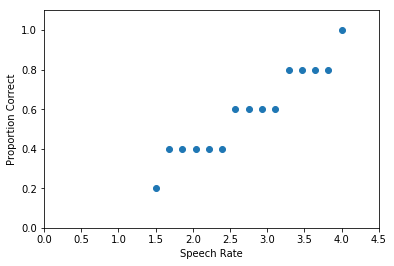

In [29]:
plt.scatter(speech_rates, accuracy/n_reps)
plt.xlim(0,4.5)
plt.ylim(0,1.1)
plt.xlabel('Speech Rate')
plt.ylabel('Proportion Correct')

## Adding variation to the decay rate

Notice that the above data does not look very realistic. Why would it be so "step-wise" like that? In reality, many of the parameters that we treated as fixed actually include some variation (or _noise_) in their values from trial-to-trial. We can simulate this by pulling a _new_ value of the parameter (from a specified distribution) for each simulated trial. That's done here with decay rate. Everything else stays the same.

In [33]:
decay_sd = 0.2
# all other parameters are maintained from above

In [34]:
## comments are removed here, but see them above

accuracy = np.zeros_like(speech_times)

for i, t in enumerate(speech_times):
    for r in range(n_reps):
        activations = np.repeat(init_activ, n_words)
        rehearsal_word = -1
        secs = 0
        
        # delay period
        while secs < delay_time:
            intact = np.where(activations>min_activ)[0]
            next_words = np.where(intact>rehearsal_word)[0]
            if next_words.size == 0:
                rehearsal_word = 0
            else:
                rehearsal_word = next_words[0]
                
            activations[rehearsal_word] = init_activ
            
            ## only change here
            # apply sd to jitter the decay rate
            trial_decay_rate = decay_rate + np.random.normal(0,decay_sd)

            activations = activations - trial_decay_rate*t
            
            secs += t
        
        n_correct = sum(activations>min_activ)
        accuracy[i] += n_correct/n_words

Text(0,0.5,u'Proportion Correct')

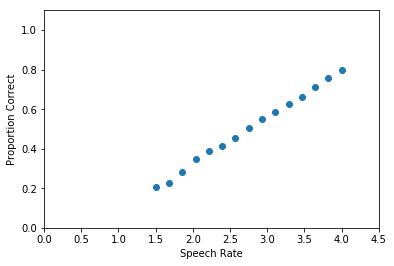

In [35]:
plt.scatter(speech_rates, accuracy/n_reps)
plt.xlim(0,4.5)
plt.ylim(0,1.1)
plt.xlabel('Speech Rate')
plt.ylabel('Proportion Correct')